In [70]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer

In [41]:
df=pd.read_csv('data/BA_titles.csv',index_col=0)
df

,titles
0,eventually make good on their promise
1,Extremely sub-par service
2,the service was excellent
3,I thoroughly enjoyed my flight
4,wouldn't let me check-in until 24 hours before
...,...
1095,BA needs to improve and fast
1096,check in my carry on luggage for free
1097,sad to see how BA service went down
1098,a no frills business class


In [3]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

c:\Users\mruga\.conda\envs\AI\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mruga\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [45]:
sentiment=[]
for i in range(0,len(df)):
    text=df['titles'][i]
    tag=sent_pipeline(text)
    sentiment.append(tag[0]['label'])
len(sentiment)

1100

In [46]:
df['Sentiment'] = sentiment

<AxesSubplot:title={'center':'Overall sentiment distribution'}, ylabel='Sentiment'>

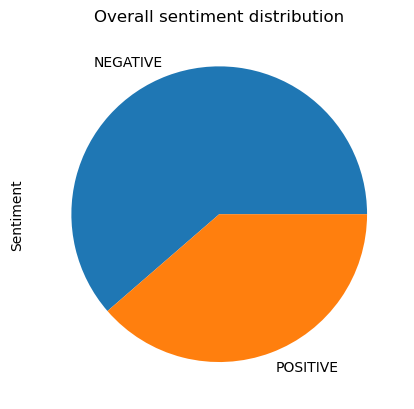

In [95]:
df['Sentiment'].value_counts().plot(kind='pie', title='Overall sentiment distribution')
